<a href="https://colab.research.google.com/github/SudheenaMisra/githubCE888/blob/main/lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [28]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [29]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [30]:
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [31]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
   x = np.random.choice(x, replace= True, size= [n_bootstraps, sample_size])  
   data_mean = x.mean()
   meanBootstrap = []
   for i in x:
     i_mean = i.mean()
     meanBootstrap.append(i_mean)

   meanBootstrap_Array = np.array(meanBootstrap)
   lower = np.percentile(meanBootstrap_Array, (100-95)/2)
   upper = np.percentile(meanBootstrap_Array, 100-lower)
   return data_mean, lower, upper



In [32]:
#calling function
bootstrap_mean(data, 14, 20)

(9.242857142857142, 7.6589285714285715, 10.746288265306122)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

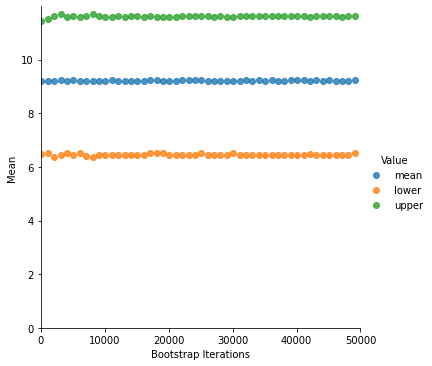

In [33]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [60]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
   sample = np.random.choice(sample, replace= True, size= [n_bootstraps, sample_size])  
   data_mean = sample.mean()
   meanBootstrap = []
   for i in sample:
     i_mean = i.mean()
     meanBootstrap.append(i_mean)

   meanBootstrap_Array = np.array(meanBootstrap)
   lower = np.percentile(meanBootstrap_Array, (100-ci)/2)
   upper = np.percentile(meanBootstrap_Array, 100-lower)
   return data_mean, lower, upper


In [38]:
bootstrap_mean_ci(data, data.shape[0],1000, 80)

(9.201642857142858, 7.35, 11.642857142857142)

In [39]:
bootstrap_mean_ci(data, data.shape[0],1000, 90)

(9.225714285714286, 6.857142857142857, 11.464081632653055)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

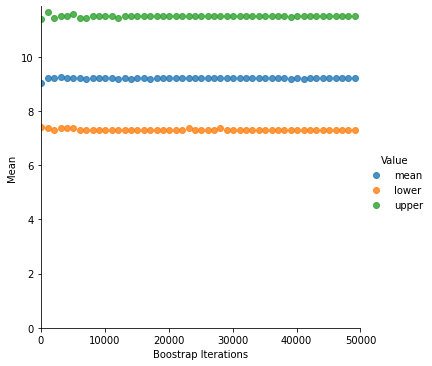

In [40]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


   Current fleet  New Fleet
0             18       24.0
1             15       27.0
2             18       27.0
3             16       25.0
4             17       31.0
<bound method DataFrame.info of      Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]>
       Current fleet  New Fleet
count     249.000000  79.000000
mean       20.144578  30.481013
std         6.414699   6.107710
min         9.000000  18.000000
25%        15.000000  25.500000
50%        19.000000  32.000000
75%        24.000000  34.000000
max        39.000000  47.000000
0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fle

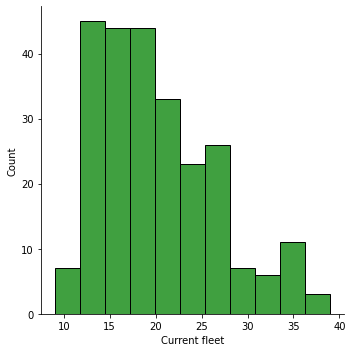

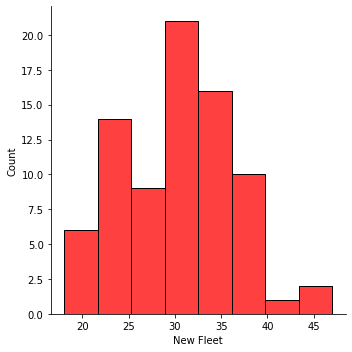

In [41]:
import matplotlib.pyplot as plt

# Load and visualise the vehicles dataset
vehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
print(vehicle.head())
print(vehicle.info)
print(vehicle.describe())
print(vehicle.iloc[:,0])
print(vehicle.iloc[:,1])

sns.displot(x=vehicle.columns[0], data=vehicle, color="Green")

sns.displot(x=vehicle.columns[1], data=vehicle, color = "red")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


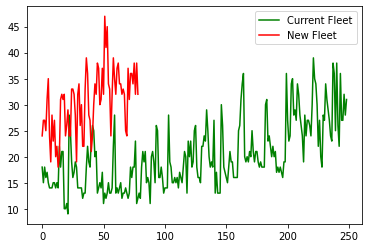

In [42]:
plt.plot(vehicle["Current fleet"], label="Current Fleet", color="Green")
plt.plot(vehicle["New Fleet"], label="New Fleet", color ="Red")
plt.legend()

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [43]:
# <---INSERT YOUR CODE HERE--->
#Calculate the mean of both samples.
print("current fleet mean: ", vehicle['Current fleet'].mean())
print("New fleet mean: ", vehicle["New Fleet"].mean())


current fleet mean:  20.14457831325301
New fleet mean:  30.481012658227847


In [44]:
#number of samples in current fleet
print(f"number of samples in current fleet is {vehicle['Current fleet'].shape[0]} ")
new = vehicle["New Fleet"]
#Keeping the non na values of new fleet
new_fleet_without_nan = (new[np.logical_not(np.isnan(new))])
#sample size of new fleet without na
print(f"number of samples in New fleet is {new_fleet_without_nan.shape[0]} ")

number of samples in current fleet is 249 
number of samples in New fleet is 79 


In [52]:
vehicle['Current fleet'].shape[0]

249

In [45]:
# sample= current fleet, sample size = length of current fleet, nbootsraps= 2000, CI = 95%
(Current_fleet_dataMean, lower, upper) = bootstrap_mean_ci(vehicle["Current fleet"], vehicle["Current fleet"].shape[0],2000,95)
print(f"The data mean of current fleet is {round(Current_fleet_dataMean, ndigits=2)} with a 95% confidence interval of [ {round(lower, ndigits=2)}, {round(upper, ndigits=2)} ]")

# sample= New fleet, sample size = length of New fleet, nbootsraps= 2000, CI = 95%
(New_fleet_dataMean, lower, upper) = bootstrap_mean_ci(new_fleet_without_nan, new_fleet_without_nan.shape[0],2000,95)
print(f"The data mean of New fleet {round(New_fleet_dataMean, ndigits=2)} with a 95% Confidence interval of [ {round(lower, ndigits=2)}, {round(upper,ndigits =2)} ]")


The data mean of current fleet is 20.14 with a 95% confidence interval of [ 19.37, 20.5 ]
The data mean of New fleet 30.49 with a 95% Confidence interval of [ 29.19, 30.85 ]


In [46]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    count = 0
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    length_sample1 = len(sample1)
    sample1_mean = sample1.mean()
    sample2_mean = sample2.mean()
    tobs = sample2_mean - sample1_mean
    for i in range(n_permutations):
      all_samples = np.concatenate((sample1,sample2))
      all_samples = np.random.permutation(all_samples)
      perm_sample1 = all_samples[:length_sample1]
      perm_sample2 = all_samples[length_sample1:]
      tperm = perm_sample2.mean() - perm_sample1.mean()
      if tperm > tobs:
        count += 1
    pvalue = count/n_permutations
    return pvalue

LAb quiz

In [47]:
bootstrap_mean_ci(new_fleet_without_nan, new_fleet_without_nan.shape[0],10000,80)

(30.48834683544304, 29.620253164556964, 30.86075949367089)

In [48]:
bootstrap_mean_ci(new_fleet_without_nan, new_fleet_without_nan.shape[0],10000,95)

(30.481287341772152, 29.164556962025316, 30.860759493670887)

In [66]:

def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
   sample = np.random.choice(sample, replace= True, size= [n_bootstraps, sample_size])  
   data_std = np.std(sample)
   stdBootstrap = []
   for i in sample:
     i_std = np.std(i)
     stdBootstrap.append(i_std)

   meanBootstrap_Array = np.array(stdBootstrap)
   lower = np.percentile(meanBootstrap_Array, (100-ci)/2)
   upper = np.percentile(meanBootstrap_Array, 100-lower)
   return data_std, lower, upper

bootstrap_std_ci(data,data.shape[0],10000,95)
  


(5.69864297041723, 2.7039276043925287, 7.3673774264314265)

In [61]:
bootstrap_mean_ci(data,data.shape[0],10000,95)

(9.184785714285715, 6.428571428571429, 11.57142857142857)

In [67]:
bootstrap_std_ci(vehicle['Current fleet'], vehicle['Current fleet'].shape[0], 10000,95)

(6.406529288949534, 5.823077686067225, 6.843017073695609)

In [78]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
print(len(dem_share_PA))
pa = np.array(dem_share_PA)
print(np.mean(pa))


67
45.476417910447765


In [80]:
bootstrap_mean_ci(pa,pa.shape[0],25000,90)

(45.48173905671643, 43.55784328358209, 45.64955223880597)

In [79]:
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
print(len(dem_share_OH))
oh = np.array(dem_share_OH)
print(np.mean(oh))



88
44.31818181818182


In [81]:
bootstrap_mean_ci(oh,oh.shape[0],25000,90)

(44.324247536363636, 42.59844886363637, 44.51747883733859)

In [82]:
p= [0,1,1,0,0]
q =[0,0,0,1,0]
permut_test(p,q,20000)

0.50305

In [ ]:
p= [0,1,1,0,0]
q =[0,1,1,1,0]
permut_test(p, q, 30000)

0.1052